# Page View Time Series Visualizer

This notebook implements the FreeCodeCamp project for visualizing time series of page views from the freeCodeCamp forum.

## Import Libraries

Import the necessary libraries for data manipulation and visualization.

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

## Load the Data

Load the CSV file containing page view data and set the index to date.

In [9]:
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=['date'], index_col='date')
print("First few rows of the data:")
print(df.head())
print("\nDataFrame information:")
print(df.info())

First few rows of the data:
            value
date             
2016-05-09   1201
2016-05-10   2329
2016-05-11   1716
2016-05-12  10539
2016-05-13   6933

DataFrame information:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2016-05-09 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1304 non-null   int64
dtypes: int64(1)
memory usage: 20.4 KB
None


## Clean the Data

Filter outliers by removing values outside the 2.5% lower and upper percentiles.

In [10]:
lower = df['value'].quantile(0.025)
upper = df['value'].quantile(0.975)
df = df[(df['value'] >= lower) & (df['value'] <= upper)]
print(f"Cleaned data: {len(df)} records remaining")

Cleaned data: 1238 records remaining


## Define Visualization Functions

Define the functions to create the plots as per project specifications.

In [11]:
def draw_line_plot():
    # Draw line plot
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(df.index, df['value'])
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')

    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.copy()
    df_bar['year'] = df_bar.index.year
    df_bar['month'] = df_bar.index.month
    df_bar = df_bar.groupby(['year', 'month'])['value'].mean().unstack()

    # Draw bar plot
    fig = df_bar.plot(kind='bar', figsize=(12, 6)).get_figure()
    ax = fig.axes[0]
    ax.set_xlabel('Years')
    ax.set_ylabel('Average Page Views')
    ax.legend(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], title='Months')

    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Ensure months are in correct order
    months_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    df_box['month'] = pd.Categorical(df_box['month'], categories=months_order, ordered=True)

    # Draw box plots (using Seaborn)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    sns.boxplot(x='year', y='value', data=df_box, ax=ax1)
    ax1.set_title('Year-wise Box Plot (Trend)')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Page Views')
    sns.boxplot(x='month', y='value', data=df_box, ax=ax2)
    ax2.set_title('Month-wise Box Plot (Seasonality)')
    ax2.set_xlabel('Month')
    ax2.set_ylabel('Page Views')

    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig

## Line Plot

Execute the function to create the daily line plot.

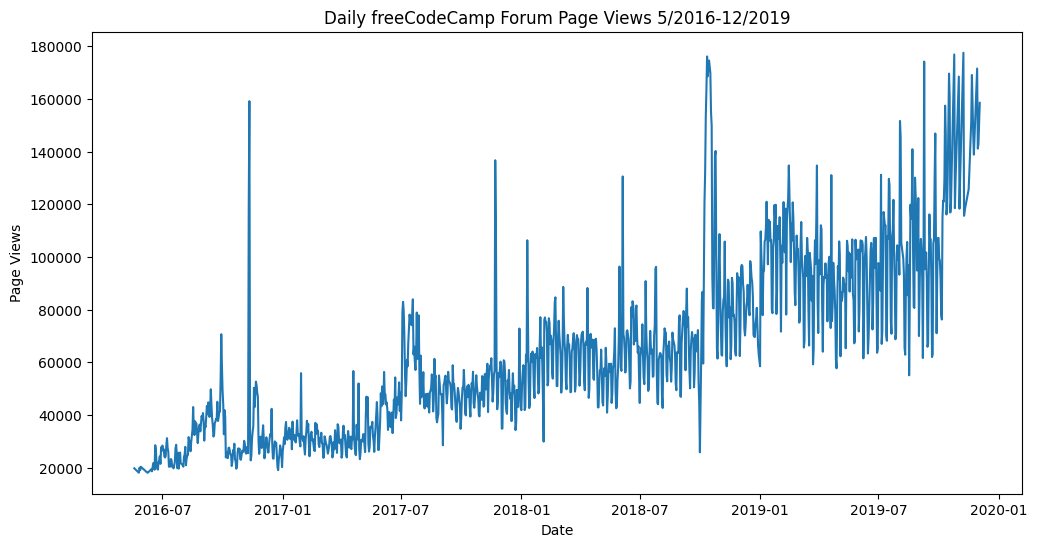

In [12]:
fig_line = draw_line_plot()
plt.show()

## Bar Plot

Execute the function to create the monthly bar plot grouped by year.

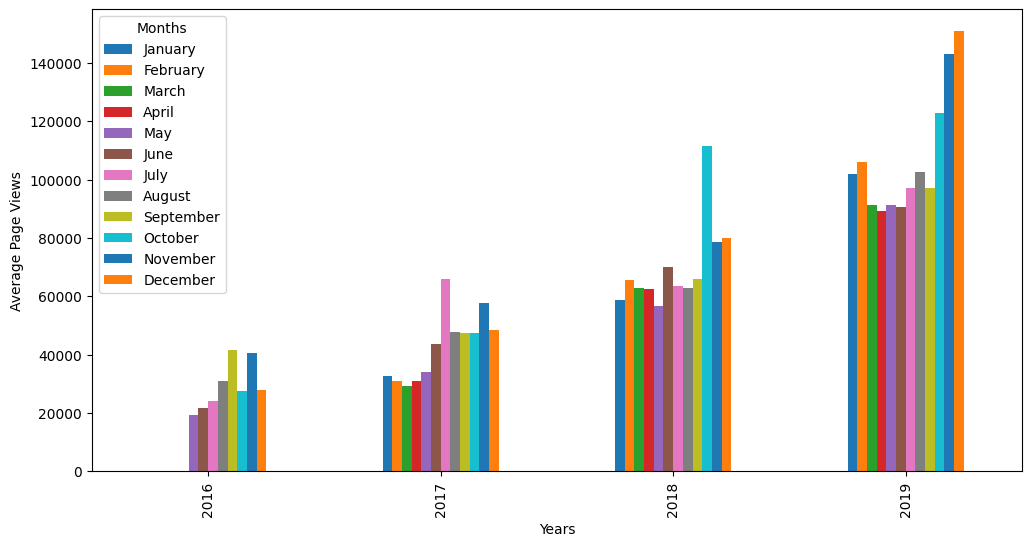

In [13]:
fig_bar = draw_bar_plot()
plt.show()

## Box Plots

Execute the function to create the box plots (yearly trend and monthly seasonality).

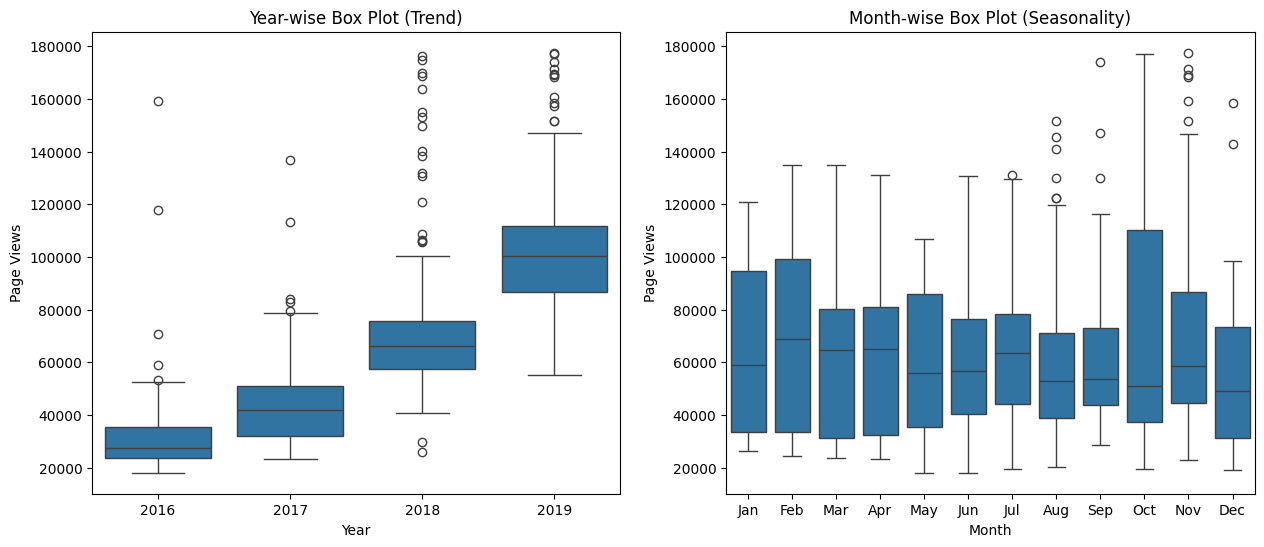

In [14]:
fig_box = draw_box_plot()
plt.show()